In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [4]:
# Set the path to the git folder and the asset folder
git_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML'))
asset_folder = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..', 'HeroysundBridge-ML-Assets'))

print("Path to git folder:", git_folder)
print("Path to asset folder:", asset_folder)

# Read Parquet file
file_path = os.path.join(asset_folder, 'bronze', 'heroysund_sensors', '2021', '02', '20210201083943.parquet')
data = pd.read_parquet(file_path)
display(data)

Path to git folder: c:\Users\erlih\repos\HeroysundBridge-ML
Path to asset folder: c:\Users\erlih\repos\HeroysundBridge-ML-Assets


,Point_1_N,Point_2_N,Point_3_N,Point_4_S,Point_5_S,Point_6_S,Omega_N,Omega_S,PT100_Temperature
0,-71.445633,-72.283882,-65.799652,-227.943542,-234.919922,-227.402725,0.465558,-0.000250,-4.478031
1,-71.526756,-72.494797,-65.750984,-228.268021,-234.779312,-226.553665,0.465498,-0.000244,-4.476759
2,-71.483490,-72.738159,-65.437317,-228.770966,-235.001038,-226.959259,0.465526,-0.000271,-4.477183
3,-71.532158,-72.689484,-65.632004,-228.208542,-234.973999,-227.884033,0.465556,-0.000350,-4.477607
4,-71.364510,-72.181129,-65.951080,-228.549240,-235.271439,-226.807831,0.465534,-0.000284,-4.478455
...,...,...,...,...,...,...,...,...,...
72029,-69.309456,-71.142784,-65.161507,-226.131851,-233.340775,-224.925842,0.470418,0.000719,-4.541609
72030,-69.017426,-71.472679,-65.312927,-226.191330,-233.156891,-225.250320,0.470416,0.000752,-4.542457
72031,-69.417618,-71.586243,-64.896507,-226.115631,-233.346176,-225.196243,0.470433,0.000699,-4.543304
72032,-69.368942,-71.586243,-64.945183,-226.364395,-233.438110,-224.915024,0.470450,0.000772,-4.542457


**Plotting total dataset**

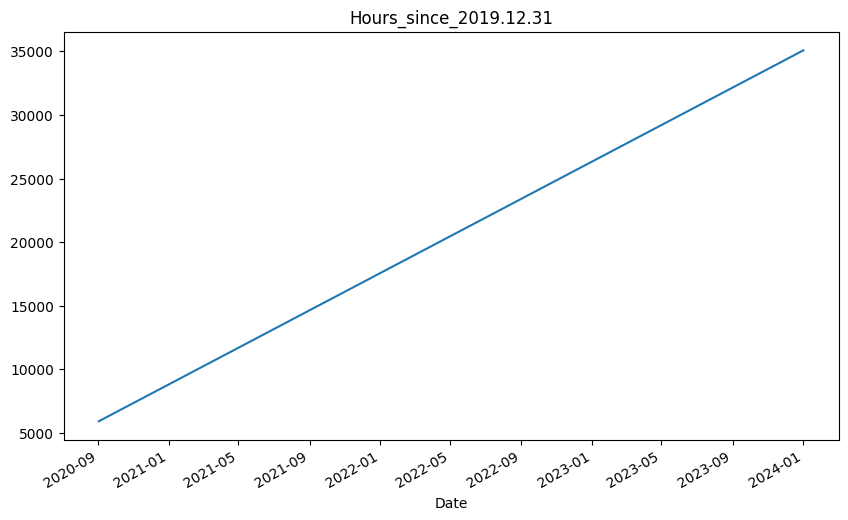

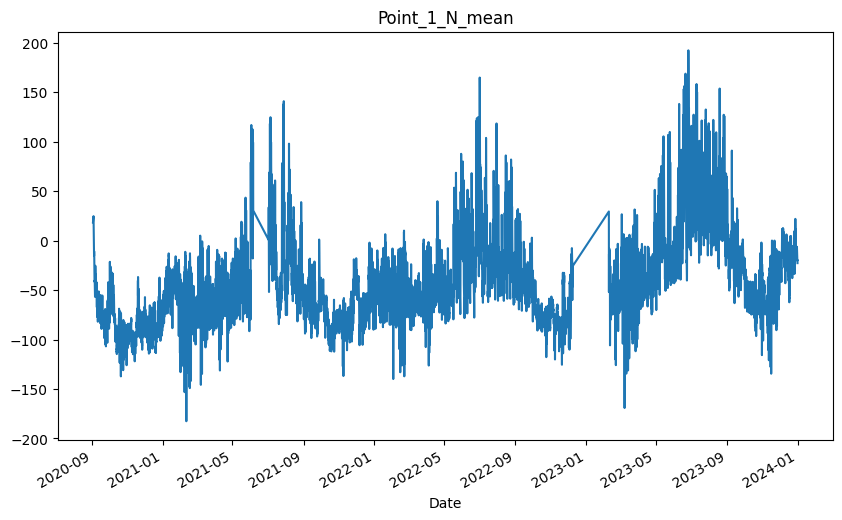

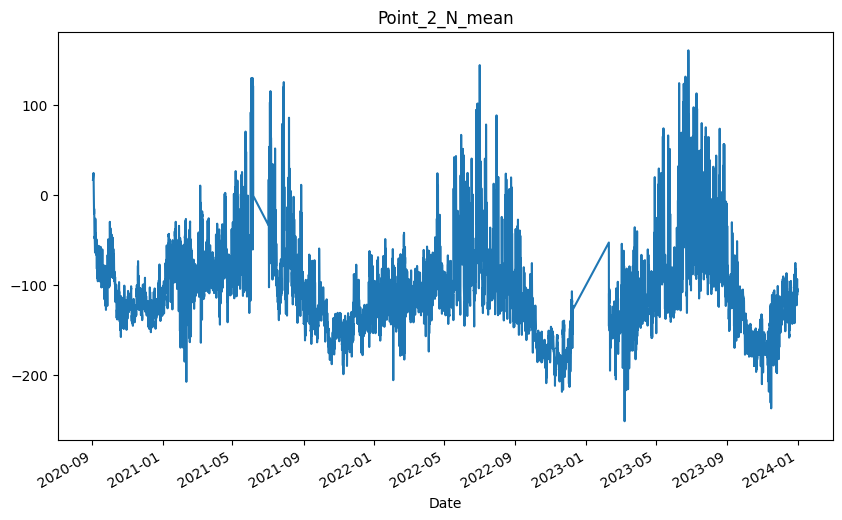

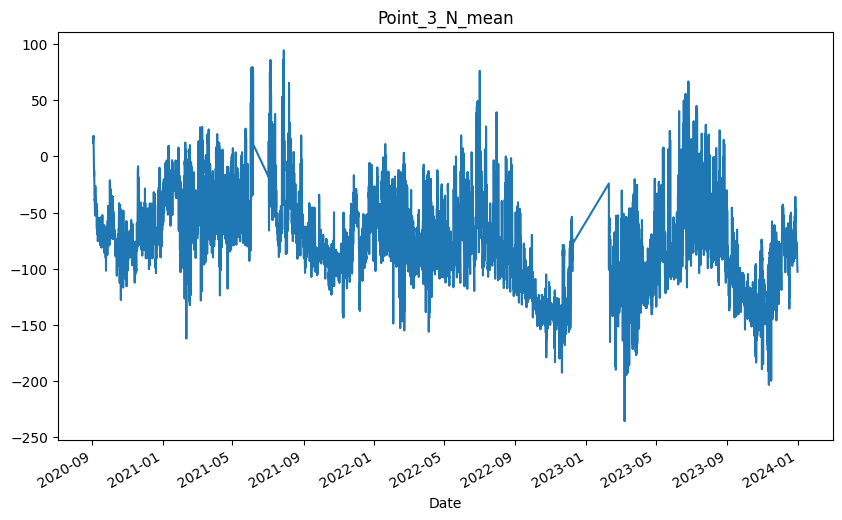

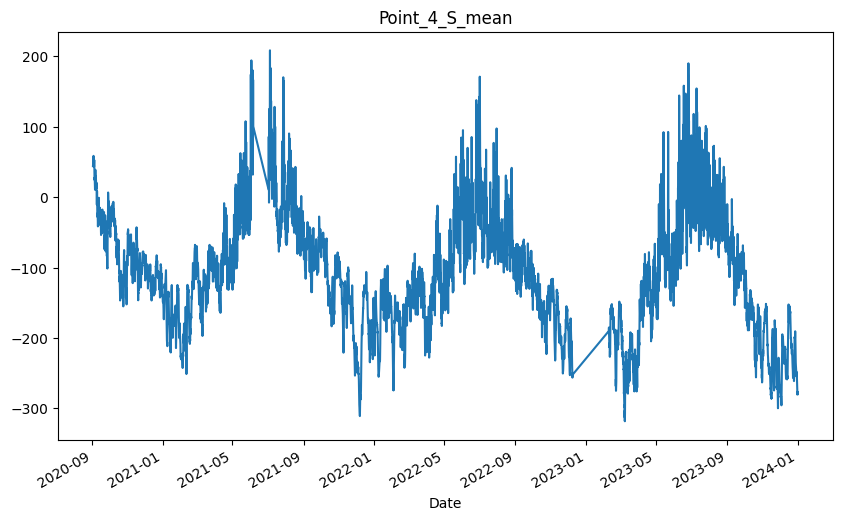

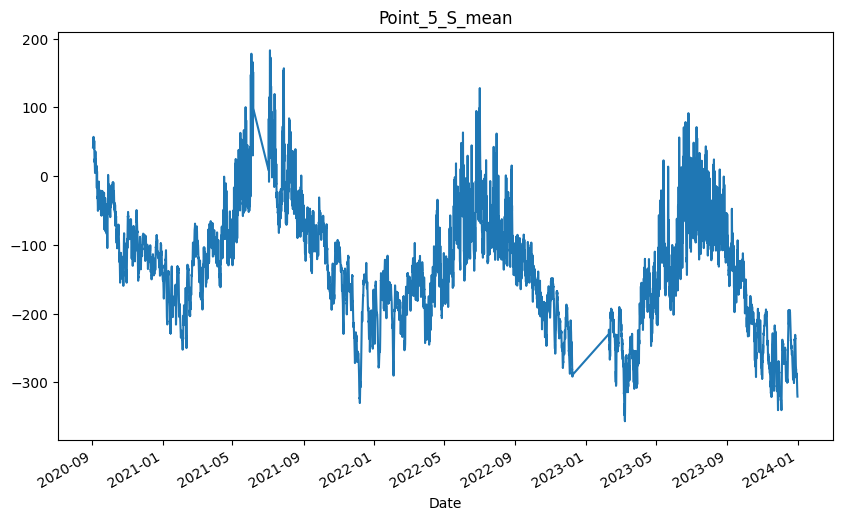

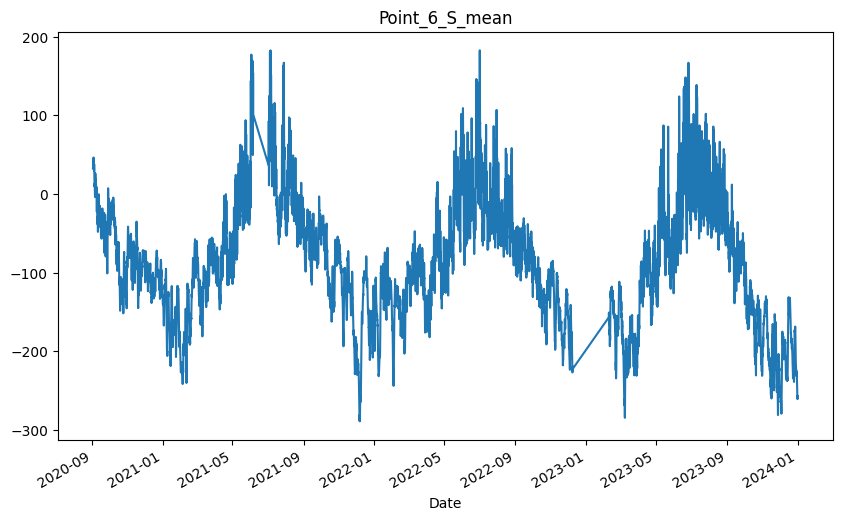

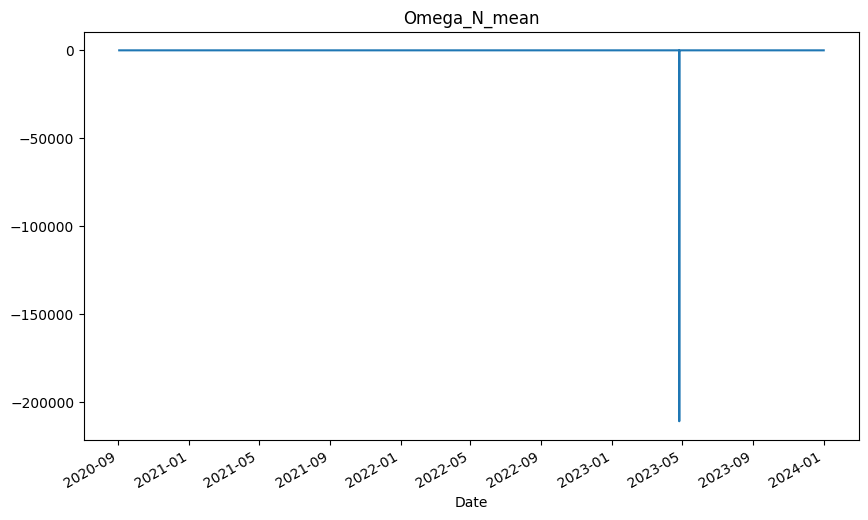

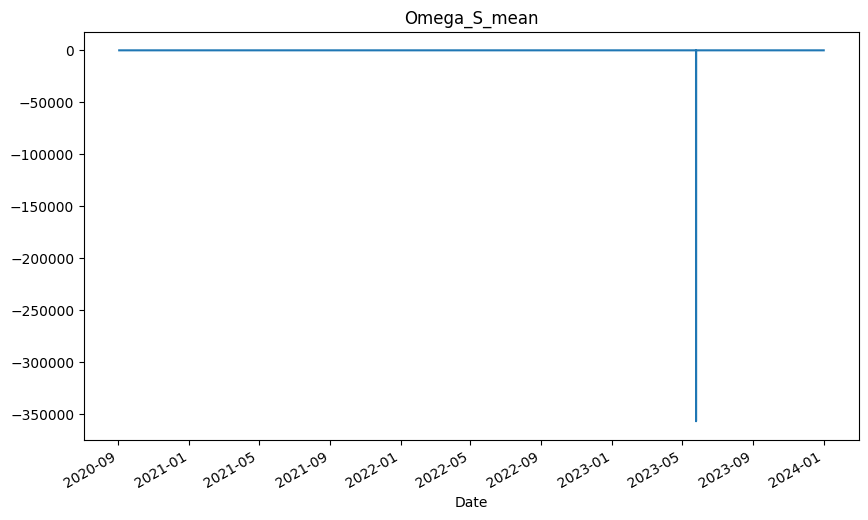

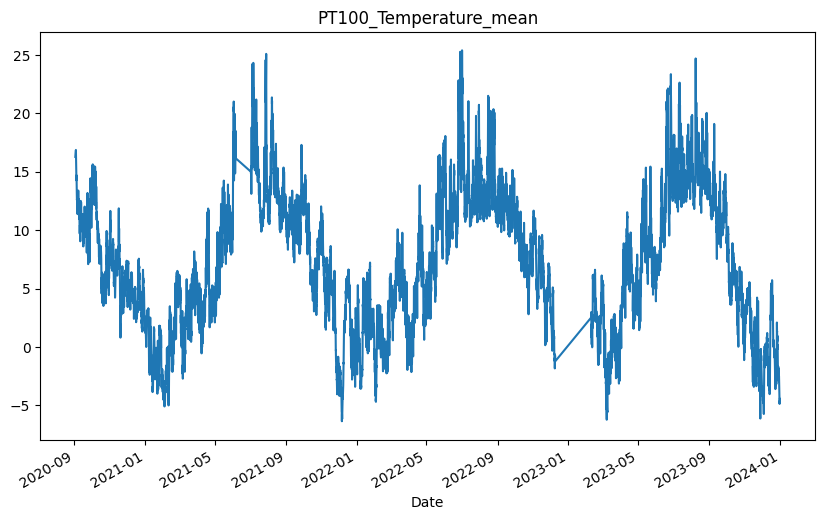

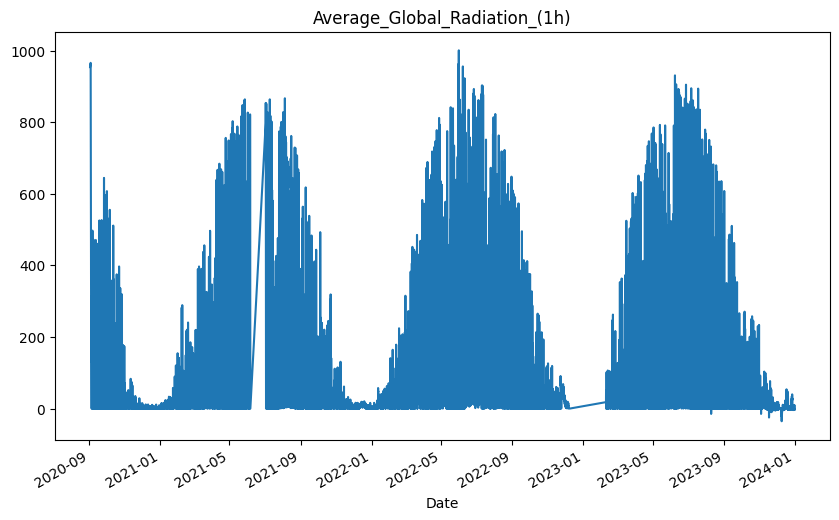

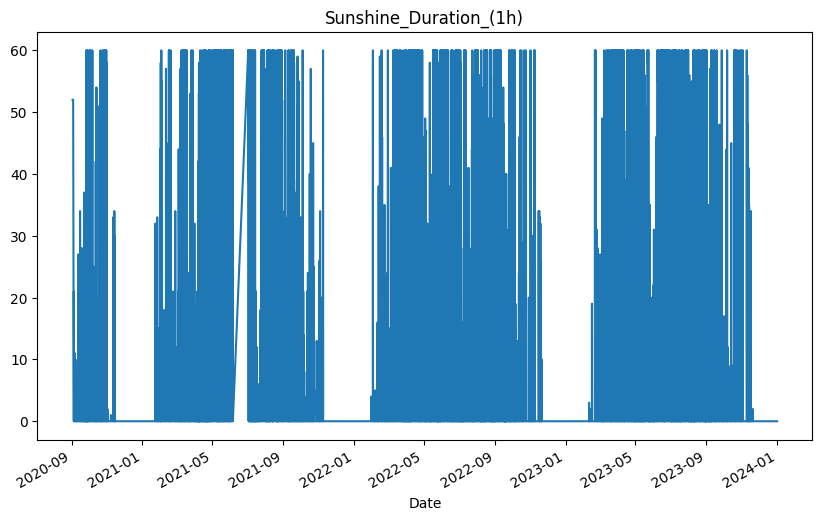

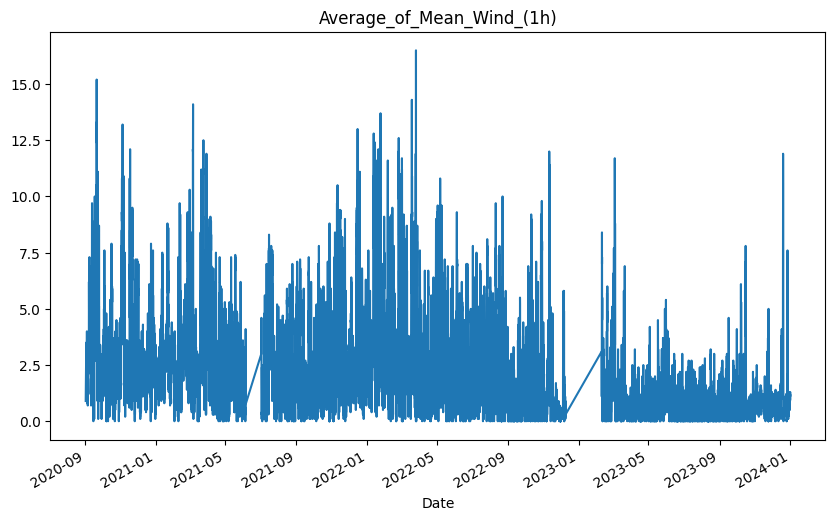

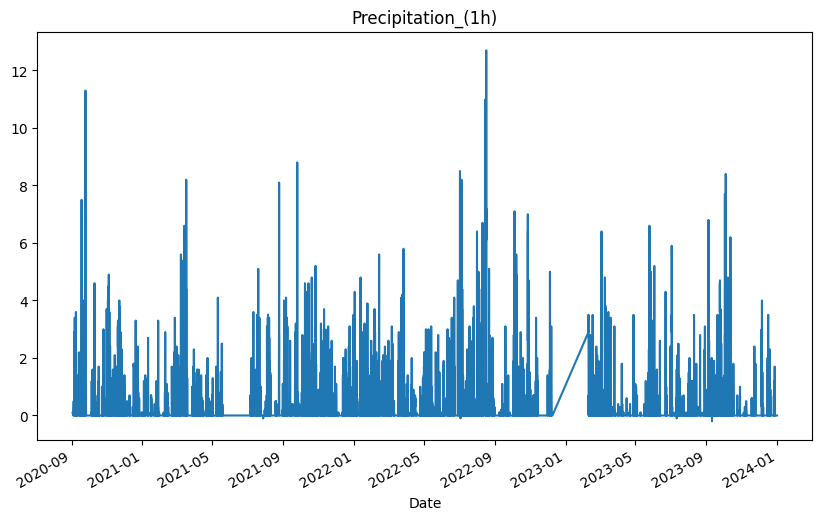

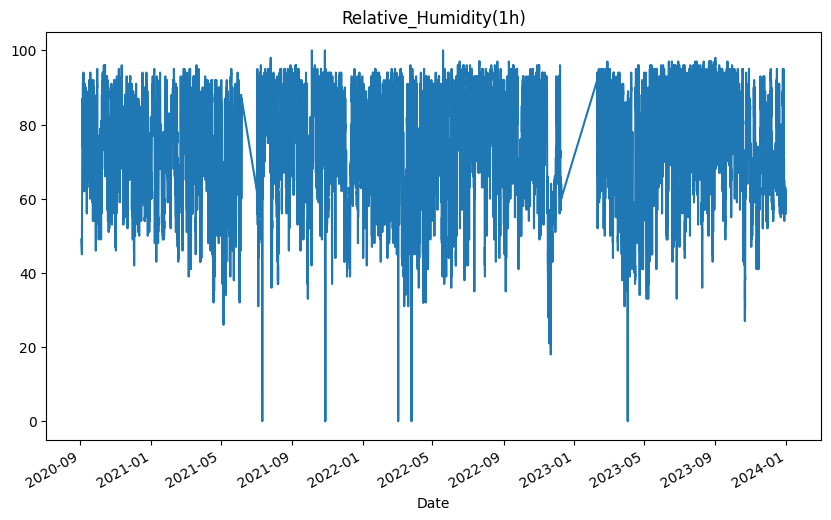

In [13]:
data.set_index('Date', inplace=True)

for column in data.columns:
    # Create a new figure
    plt.figure(figsize=(10,6))
    # Plot the column
    data[column].plot()
    # Add a title
    plt.title(column)
    # Show the plot
    plt.show()
    
# Convert 'Date' column to datetime object
#data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d%H')


**Plotting total dataset with outlier removal**

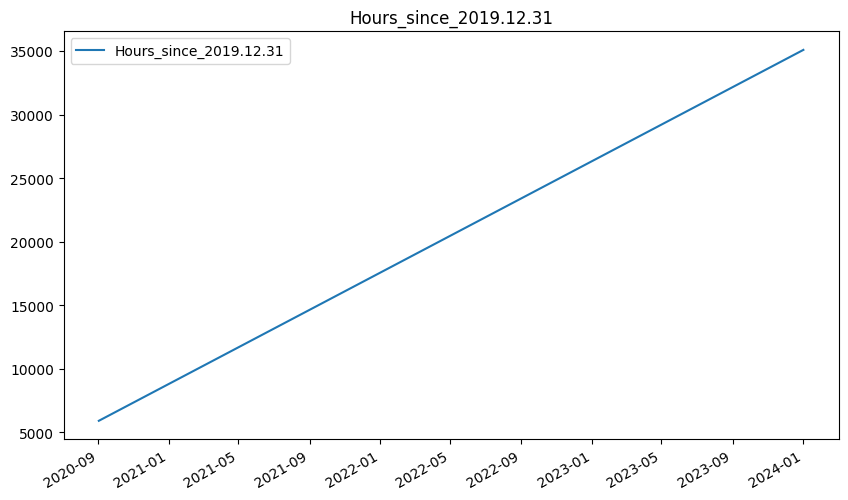

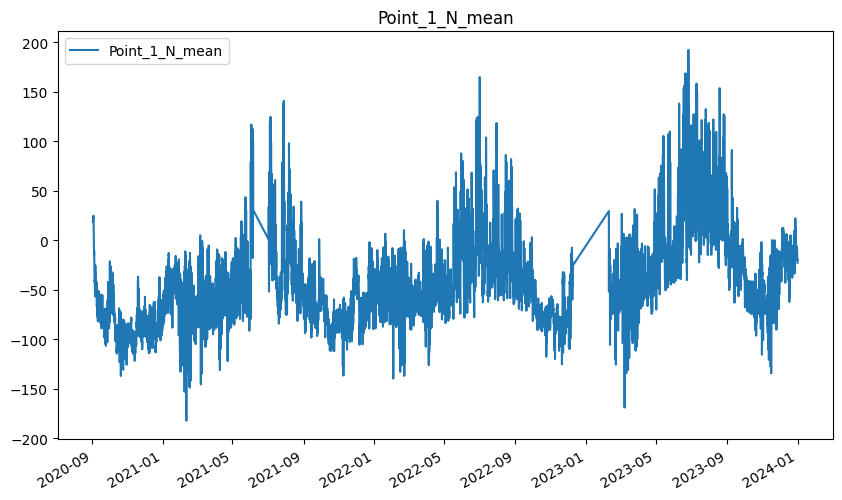

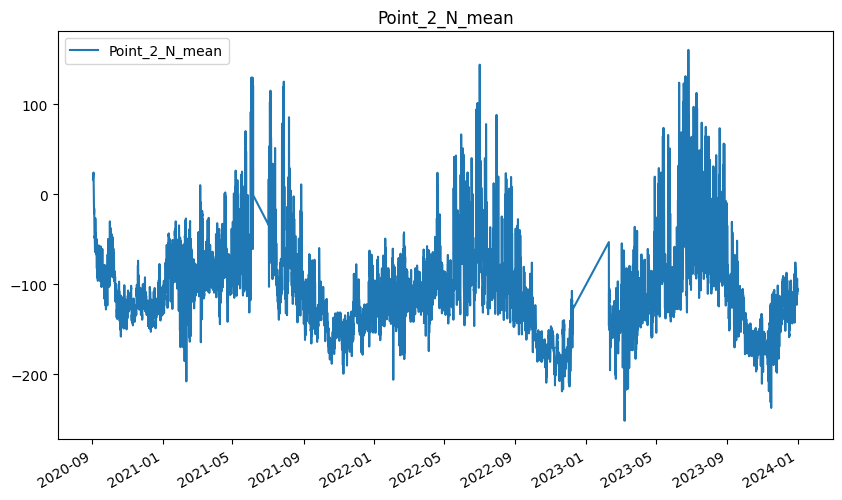

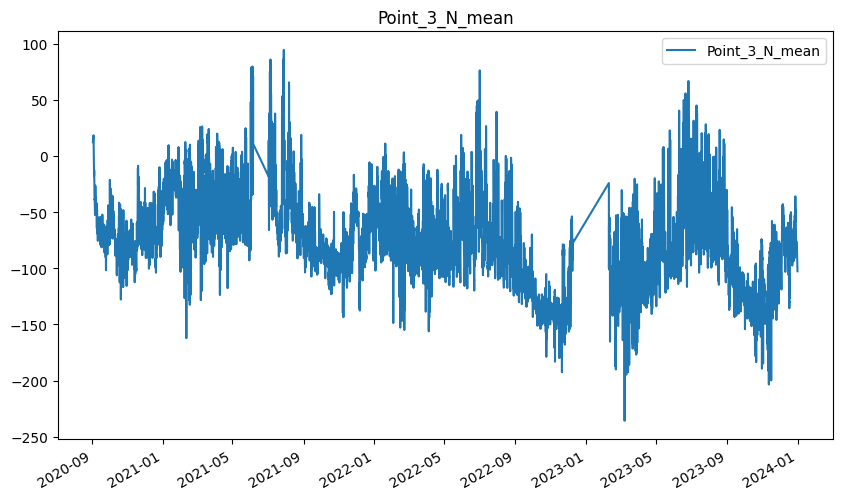

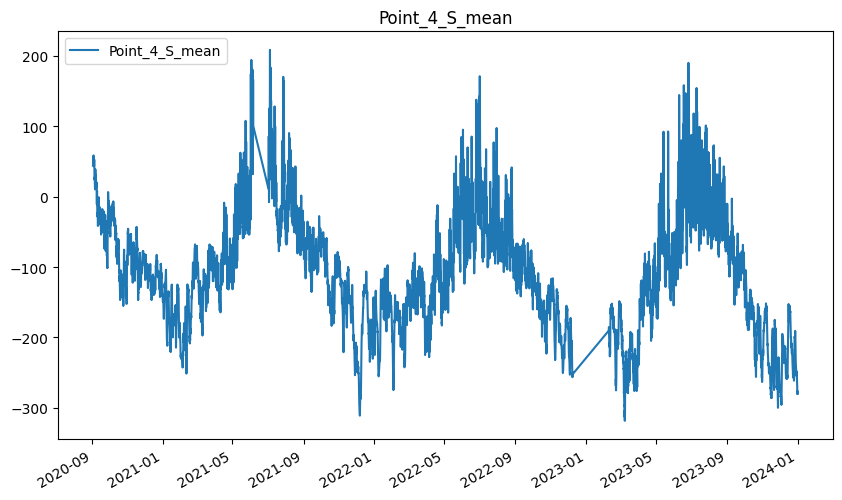

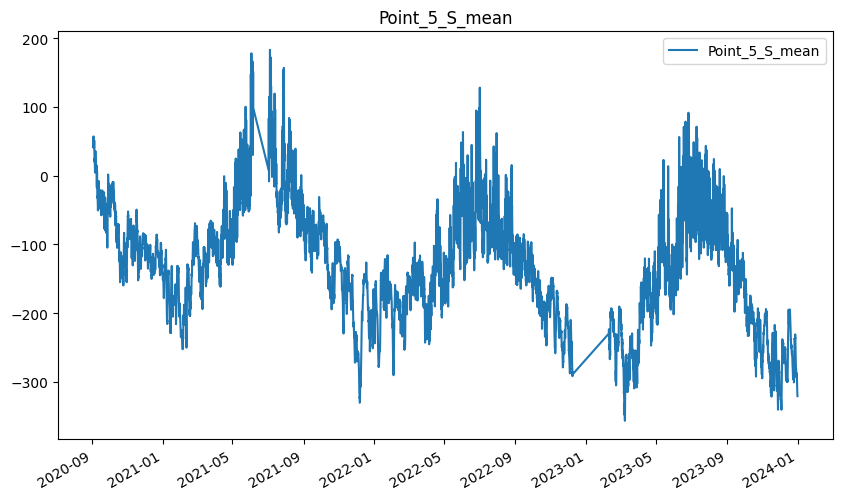

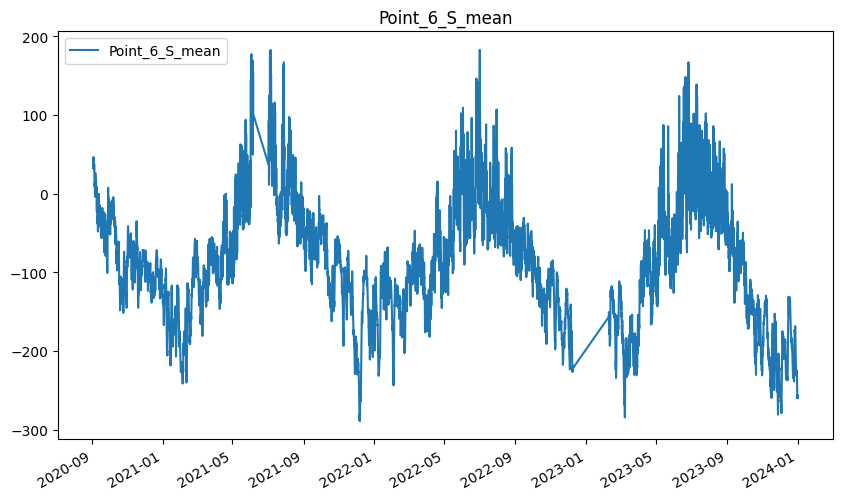

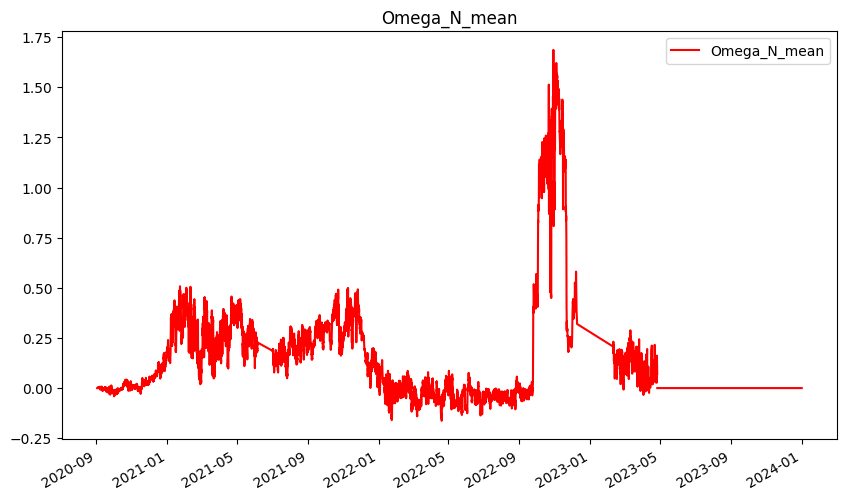

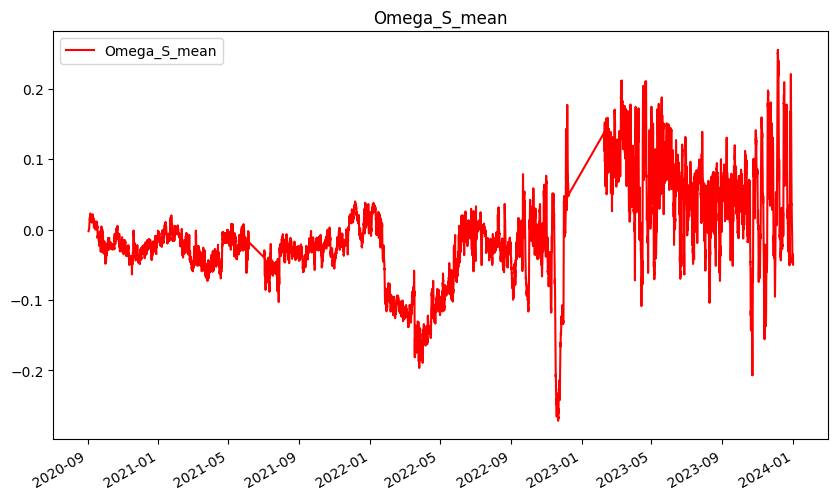

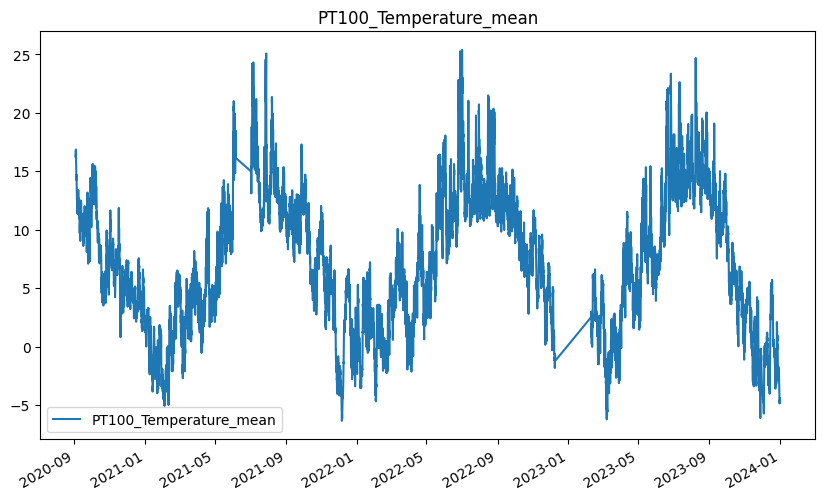

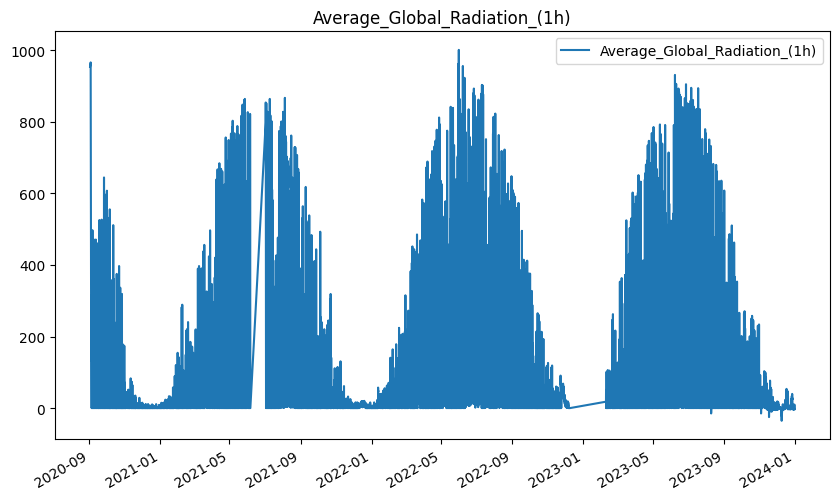

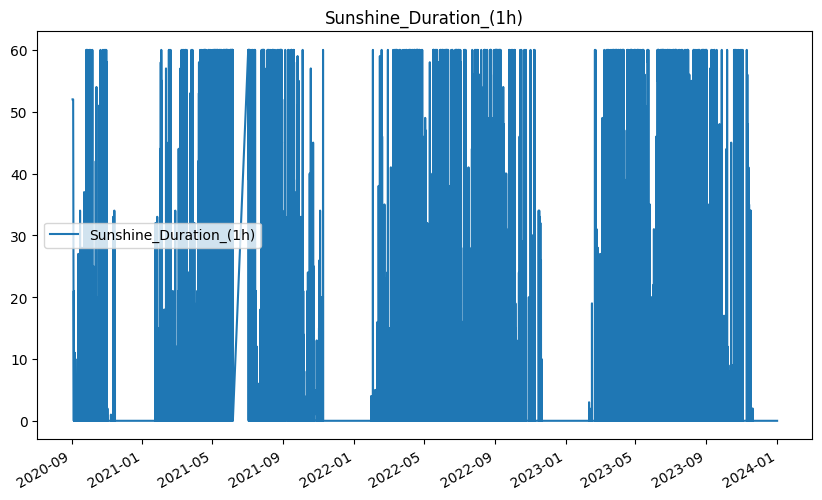

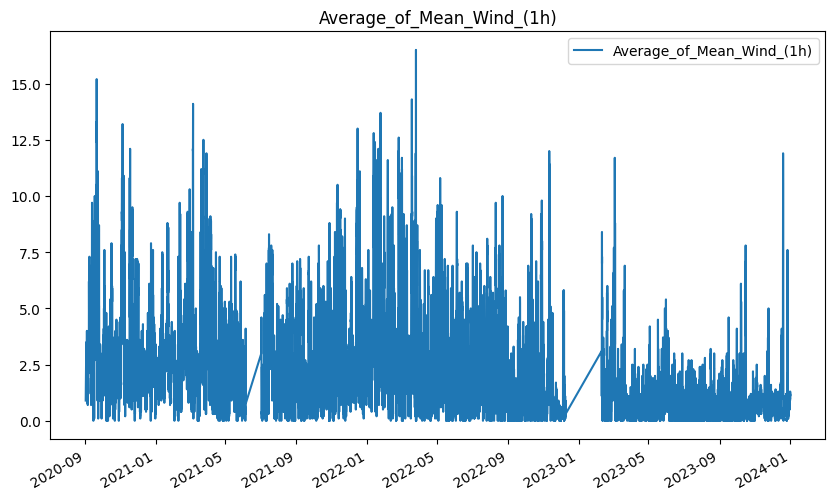

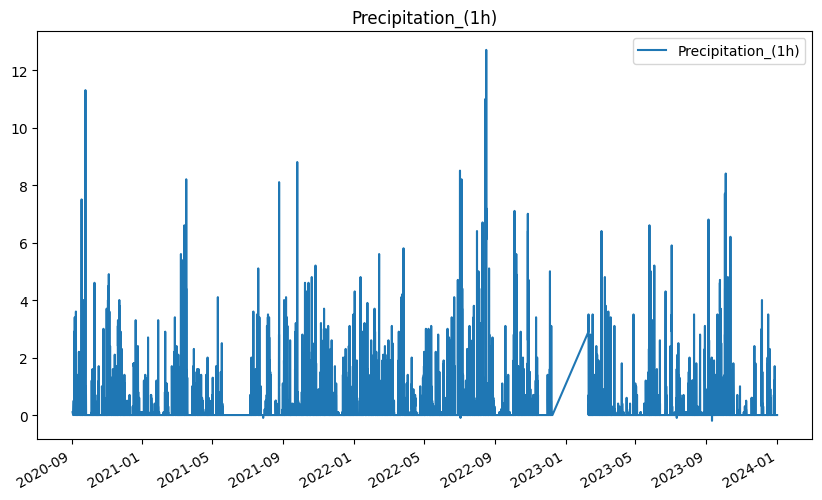

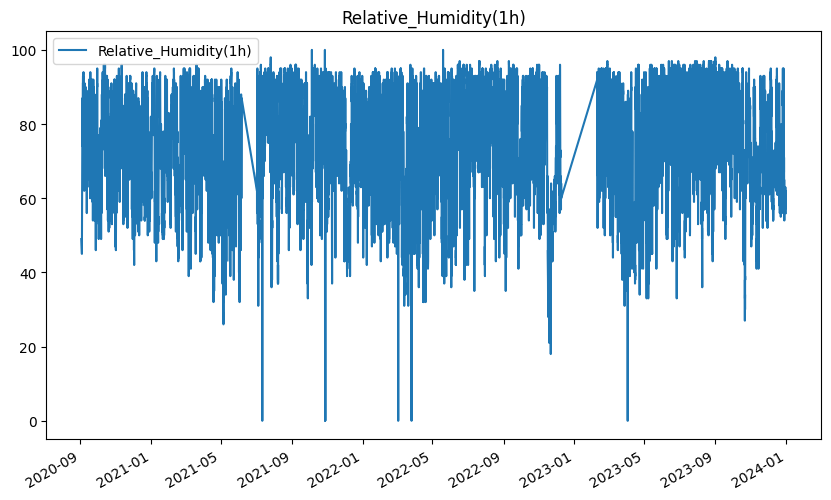

In [40]:
for column in data.columns:
    plt.figure(figsize=(10, 6))
    
    # If plotting Omega columns, adjust values on the fly without modifying the DataFrame
    if column in ['Omega_N_mean', 'Omega_S_mean']:
        # Temporarily adjust Omega values for plotting: set values < -1.8 or == 0 to NaN
        adjusted_values = data[column].apply(lambda x: np.nan if x < -1.8 else x)
        plt.plot(data.index, adjusted_values, label=column, color='r')
    else:
        # Plot other sensor data directly
        plt.plot(data.index, data[column], label=column)
    
    plt.title(column)
    plt.legend()
    plt.gcf().autofmt_xdate()  # Auto-format date labels for readability
    plt.show()